In [9]:
from tensorflow.keras import datasets, layers, models, utils, callbacks
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

# 검증세트
train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size=.2, random_state=42)

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=3, activation='relu', padding='same',
                        input_shape=(28, 28, 1)))

In [3]:
model.add(layers.MaxPool2D(2))

In [4]:
model.add(layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(layers.MaxPool2D(2))

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

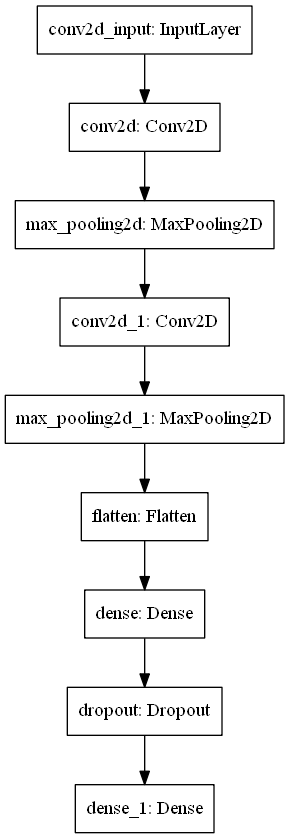

In [7]:
import pydot
import graphviz
utils.plot_model(model)

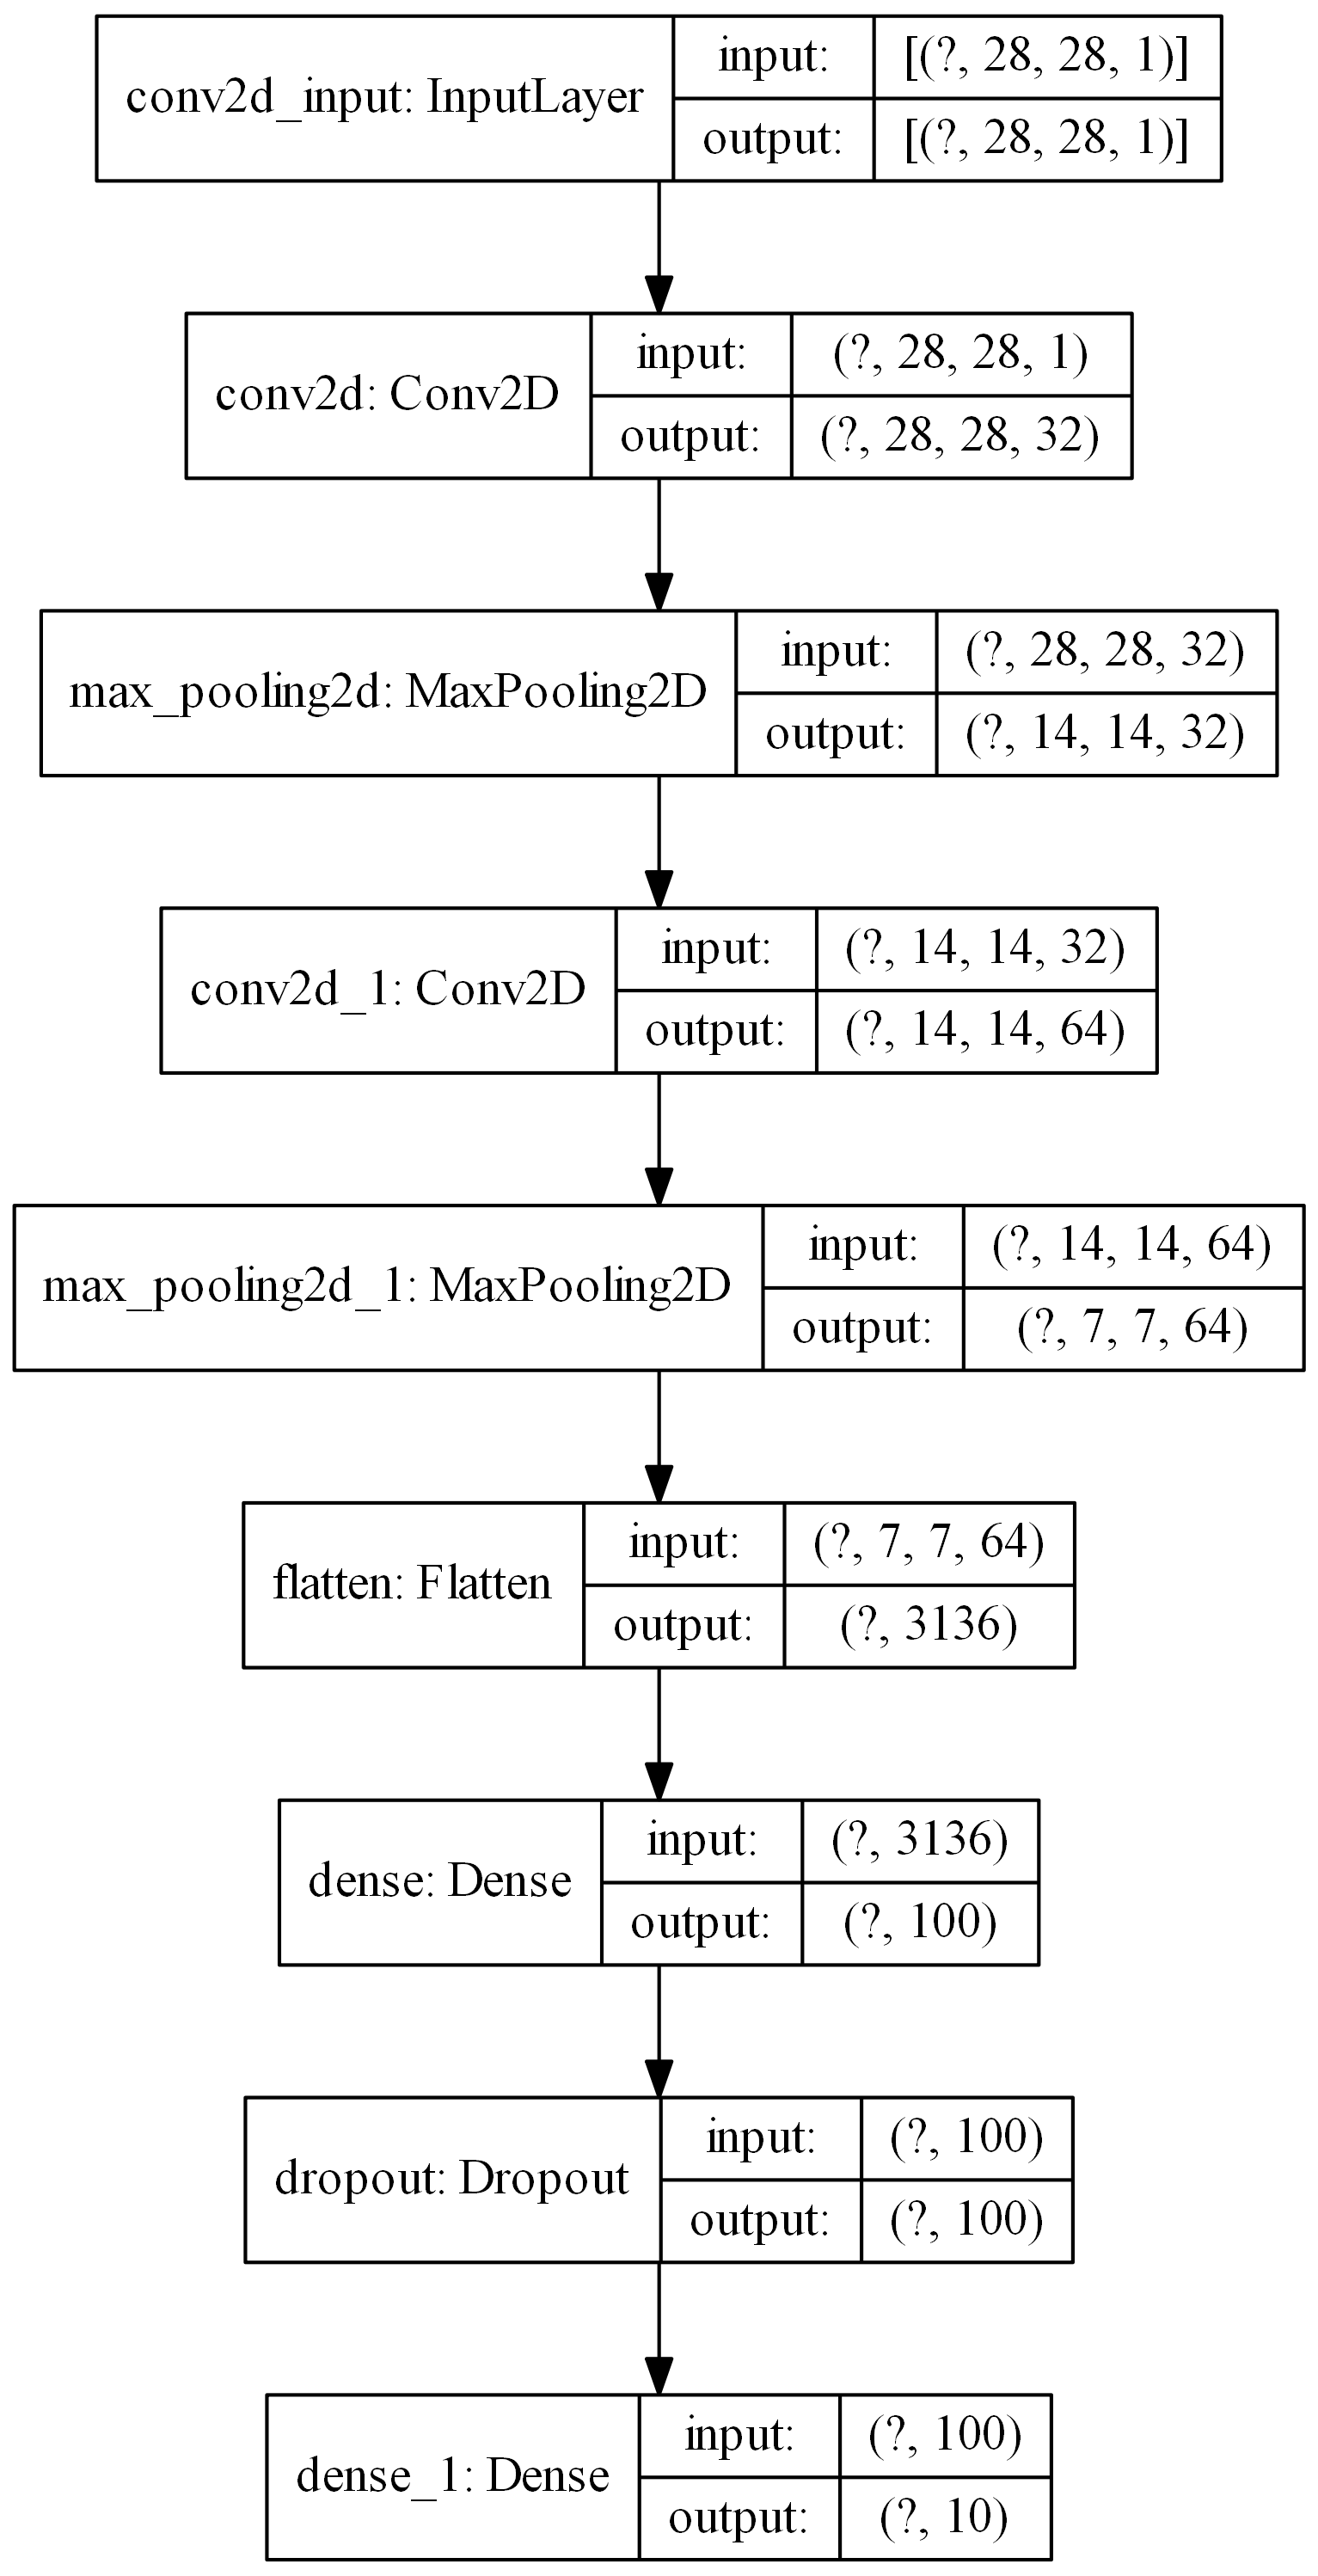

In [8]:
utils.plot_model(model, show_shapes=True, 
                 to_file='cnn-achitecture.png', dpi=300)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 복구점
checkpoint_cb = callbacks.ModelCheckpoint('best-cnn-model.h5')
# 조기종료
early_stopping_cb = callbacks.EarlyStopping(patience=2, 
                                            restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 31s 638us/sample - loss: 0.5387 - accuracy: 0.8076 - val_loss: 0.3421 - val_accuracy: 0.8738
Epoch 2/20
48000/48000 [==============================] - 28s 592us/sample - loss: 0.3532 - accuracy: 0.8748 - val_loss: 0.2895 - val_accuracy: 0.8915
Epoch 3/20
48000/48000 [==============================] - 29s 602us/sample - loss: 0.3049 - accuracy: 0.8905 - val_loss: 0.2551 - val_accuracy: 0.9047
Epoch 4/20
48000/48000 [==============================] - 28s 593us/sample - loss: 0.2750 - accuracy: 0.9003 - val_loss: 0.2498 - val_accuracy: 0.9075
Epoch 5/20
48000/48000 [==============================] - 29s 600us/sample - loss: 0.2514 - accuracy: 0.9082 - val_loss: 0.2364 - val_accuracy: 0.9109
Epoch 6/20
48000/48000 [==============================] - 29s 599us/sample - loss: 0.2275 - accuracy: 0.9156 - val_loss: 0.2266 - val_accuracy: 0.9156
Epoch 7/20
48000/48000 [====================

In [11]:
model.evaluate(val_scaled, val_target)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.22244781500597796, 0.91933334]

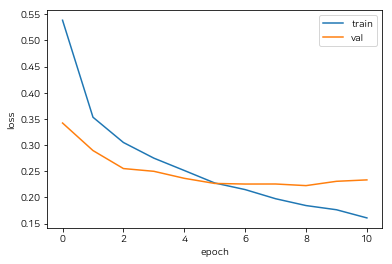

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

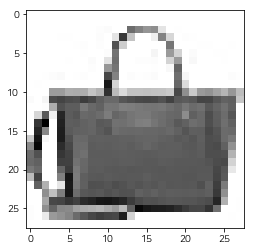

In [13]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [14]:
preds = model.predict(val_scaled[0:1])
preds

array([[3.4011737e-16, 4.8959702e-24, 6.6829298e-20, 2.8473276e-19,
        5.6394781e-19, 3.8568123e-17, 9.3706164e-16, 1.1296623e-13,
        1.0000000e+00, 5.3060917e-19]], dtype=float32)

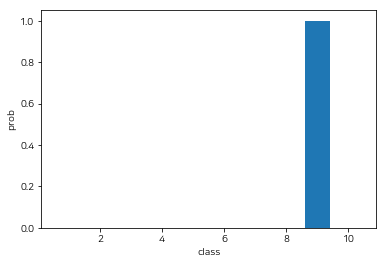

In [15]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

### 레이블 : 0-9까지의 정수배열, 옷의 클래스
0. T-shirts/Top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneakers
8. Bag
9. Ankle Boots

In [16]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '스니커즈', 
           '가방', '앵클부츠']

In [17]:
import numpy as np
print(classes[np.argmax(preds)])

가방


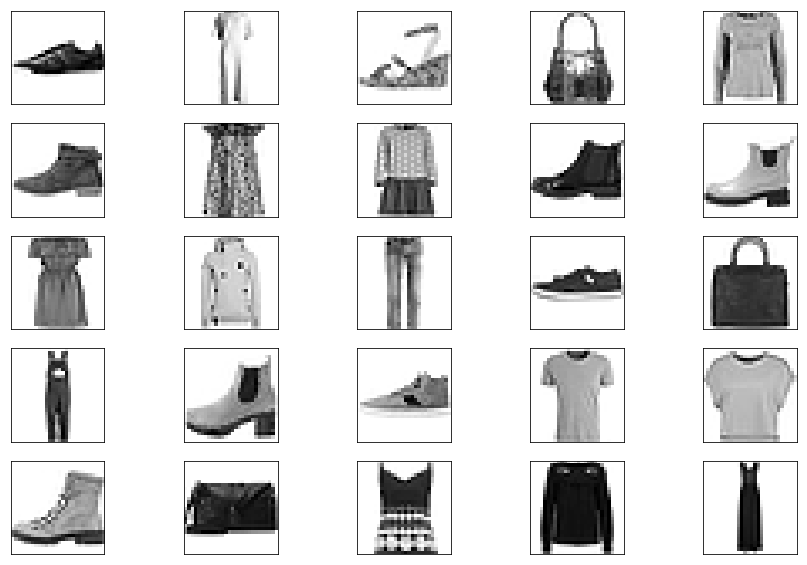

In [51]:
plt.figure(figsize=(15, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_scaled[i].reshape(28, 28), cmap='gray_r')
    #plt.xlabel(classes[i])
    
plt.show()